In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
pwd

'/home/davidoh/Documents/Data_Science_BootCamp'

In [49]:
ls *.csv

AnscombesQuartet.csv  BULLMARKET.csv  somedata.csv


In [50]:
DF = pd.read_csv("BULLMARKET.csv")
DF[:3]

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2009.216438,7402.310059,7460.930176,7257.830078,7278.379883,7278.379883,672950000
1,1,2009.224658,7279.250000,7780.720215,7278.779785,7775.859863,7775.859863,515600000
2,2,2009.227397,7773.470215,7796.569824,7646.990234,7659.970215,7659.970215,379670000


In [51]:
X = np.array(DF["Date"])
Y = np.array(DF["Open"])

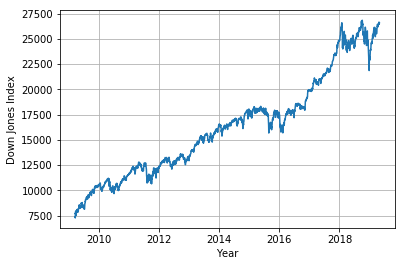

In [52]:
plt.plot(X,Y)
plt.xlabel("Year")
plt.ylabel("Down Jones Index")
plt.grid()

(2010, 2010.125)

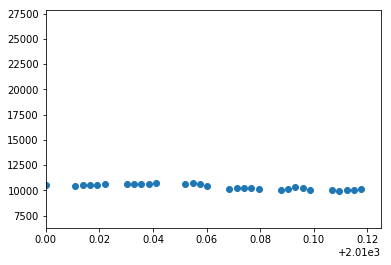

In [53]:
plt.scatter(X,Y)
plt.xlim(2010, 2010.125)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
X = X.reshape(-1,1)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [56]:
LR = LinearRegression()

In [58]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

model.intercept_

model.coef_

In [64]:
np.linspace(2008,2020,10) #From 2008 to 2010, 10 points

array([2008.        , 2009.33333333, 2010.66666667, 2012.        ,
       2013.33333333, 2014.66666667, 2016.        , 2017.33333333,
       2018.66666667, 2020.        ])

In [65]:
x_points_for_pretty_plot=np.linspace(2008,2020,10)

In [66]:
y_points_for_pretty_plot=LR.predict(x_points_for_pretty_plot.reshape(-1,1))

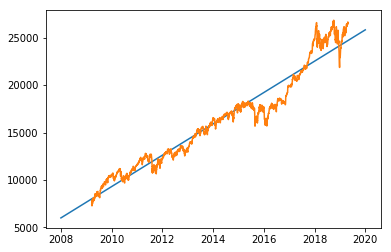

In [68]:
plt.plot(x_points_for_pretty_plot,y_points_for_pretty_plot)
plt.plot(X,Y)

In [82]:
YP=LR.predict(X)

In [72]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(YP,ytest)

In [73]:
mean_squared_error(YP,ytest)

1479458.8622611247

In [74]:
np.sqrt(mean_squared_error(YP,ytest))

1216.3300794854679

In [87]:
YPall=LR.predict(X)

Text(0.5, 1.0, 'Residuals: Prediction Error')

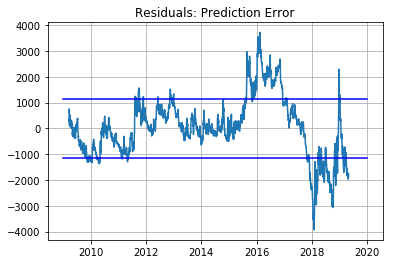

In [89]:
plt.plot(X,YPall-Y)
plt.grid()
plt.plot([2009,2020],[1138.8,1138.8],c="blue")
plt.plot([2009,2020],[-1138.8,-1138.8],c="blue")
plt.title("Residuals: Prediction Error")

In [115]:
nruns=1000
RMSVALS=[]
R2VALS=[]

for j in range(nruns):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    model=LR.fit(xtrain,ytrain)
    YP=LR.predict(xtest)
    RMS=np.sqrt(mean_squared_error(YP,ytest))
    R2=r2_score(YP,ytest)
    RMSVALS.append(RMS)
    R2VALS.append(R2)

Text(0.5, 0, 'RMS')

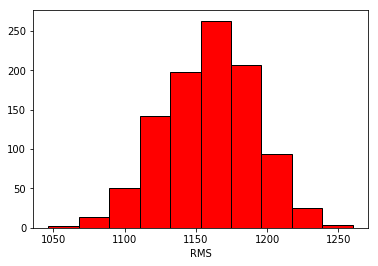

In [116]:
info=plt.hist(RMSVALS,edgecolor="Black",facecolor="red")
plt.xlabel("RMS")

In [117]:
info

(array([  2.,  14.,  51., 142., 198., 263., 207.,  94.,  25.,   4.]),
 array([1046.53210787, 1067.88805196, 1089.24399604, 1110.59994013,
        1131.95588421, 1153.3118283 , 1174.66777239, 1196.02371647,
        1217.37966056, 1238.73560465, 1260.09154873]),
 <a list of 10 Patch objects>)

In [134]:
nruns=100
RMSVALS=[]
R2VALS=[]
ALLRMS=[]
ALLR2=[]
X=X.ravel()
Y=Y.ravel()

for degree in range(2,15):
    RMSVALS=[]
    R2VALS=[]
    for j in range(nruns):
        xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
        coefficients=np.polyfit(xtrain,ytrain,1)
        YP=np.polyval(coefficients,xtest)
        RMS=np.sqrt(mean_squared_error(YP,ytest))
        R2=r2_score(YP,ytest)
        RMSVALS.append(RMS)
        R2VALS.append(R2)
    ALLRMS.append(RMSVALS)
    ALLR2.append(R2VALS)

AttributeError: 'builtin_function_or_method' object has no attribute 'ravel'

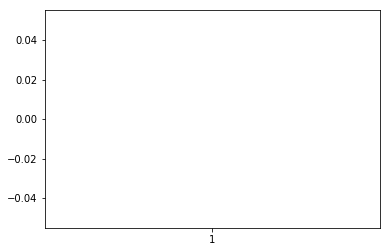

In [132]:
plt.boxplot(ALLRMS);

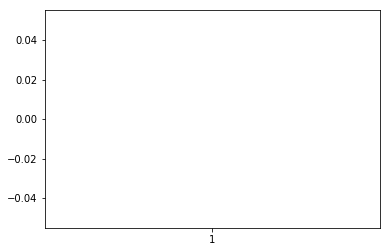

In [131]:
plt.boxplot(ALLR2);

In [135]:
plt.plot(XPLOT,YPLOT)
plt.plot(X,Y)

NameError: name 'XPLOT' is not defined